To note:

- No idea what b is 
- Below is a couple of definitions from the GitHub page which might come in handy

Link travel time = free flow time * ( 1 + B * (flow/capacity)^Power ).
Link generalized cost = Link travel time + toll_factor * toll + distance_factor * distance

# Setup: import packages

In [17]:
#install packages if required
#%pip install networkx

In [18]:
#import packages 
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import graphviz
import scipy.integrate as integrate 
from scipy.optimize import minimize_scalar
from scipy.misc import derivative
import numpy as np
import os
from random import *
import pickle

In [19]:
#create cities dictionary
def make_dict(cities):
    cities_dict = {}
    for city in cities:
        link_file_path = data_path + city + '/' + city + '_net.tntp.txt'
        node_file_path = data_path + city + '/' + city +'_nodes.tntp.txt'
        trip_file_path = data_path + city + '/' + city + '_trips.tntp.txt'
        cities_dict[city] = {}
        to_add = {'link_file_path': link_file_path, 'node_file_path': node_file_path, 'trip_file_path': trip_file_path}
        cities_dict[city]['file_paths'] = to_add 
    return cities_dict

# Set file paths and city as Sioux Falls

In [20]:
data_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/'
cities = ['EMA']
data_path = data_path 
os.chdir(data_path)

# Import required classes

In [21]:
classes_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Code/Python/working_multiple_eq_flow/' + cities[0] + '_30/' + 'pytrans_working_multiple_eq_flow'
#network_analysis_path_niamh = r'C:\Users\35387\OneDrive\Documents\Networks\New folder\Networks_Term_Paper\pytrans_UrbanNetworkAnalysis\pytrans\UrbanNetworkAnalysis\original_edited'
os.chdir(classes_path)
import Frank_Wolfe
import TransportationNetworks as tn
import visualize_graph
import custom_class

# Make dict

In [22]:
cities_dict = make_dict(cities)
cities_dict

{'EMA': {'file_paths': {'link_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/EMA/EMA_net.tntp.txt',
   'node_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/EMA/EMA_nodes.tntp.txt',
   'trip_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/EMA/EMA_trips.tntp.txt'}}}

# instantiate class

In [23]:
#instantiate class 
trial_run = custom_class.fw_custom_algorithm(cities_dict)

# Observe Sioux Falls

In [24]:
#set city for investigation
city = cities[0]

In [25]:
#create csv
trial_run.create_links_csv()
cities_dict[city]['csv'].head(10)
cities_dict[city]['csv']['term_node'].value_counts(ascending = True).head(23)

70    1
68    1
15    1
12    1
56    1
61    1
55    1
66    1
2     1
62    1
64    1
5     2
72    2
73    2
4     2
74    2
63    3
38    3
39    3
53    3
52    3
50    3
37    3
Name: term_node, dtype: int64

In [26]:
value_counts = cities_dict[city]['csv']['init_node'].value_counts(ascending = True).reset_index().rename(columns={"index": "init_node", "init_node": "origin_node_count"})
origin_nodes_to_remove = list(value_counts[value_counts['origin_node_count'] != 1]['init_node'])
csv = cities_dict[city]['csv']
#get edges_to_remove from csv file
origin_edges_to_remove = csv[csv['init_node'].isin(origin_nodes_to_remove)].index#this is custom here since we cannot remove links where the origin node only has one outward link --> unable to therefore compute the shortest path in the all or nothing assignment. 
value_counts = cities_dict[city]['csv']['term_node'].value_counts(ascending = True).reset_index().rename(columns={"index": "term_node", "term_node": "term_node_counts"})
term_nodes_to_remove = list(value_counts[value_counts['term_node_counts'] != 1]['term_node'])
csv = cities_dict[city]['csv']
term_edges_to_remove = csv[csv['term_node'].isin(term_nodes_to_remove)].index
test_origins = set(origin_edges_to_remove)
term_origins = set(origin_edges_to_remove)
edges_to_remove = list(test_origins & term_origins)

In [27]:
term_edges_to_remove

Int64Index([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,
            ...
            244, 245, 246, 249, 251, 252, 253, 255, 256, 257],
           dtype='int64', length=247)

# Plot graph

Total number of nodes in EMA: 74
Total number of edges in EMA: 258
Graph for: EMA


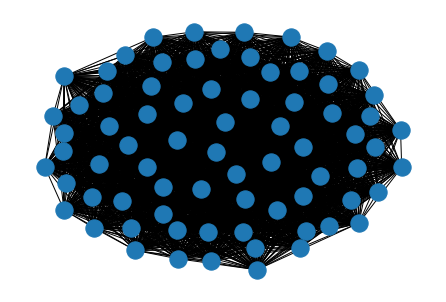

In [28]:
#Create csvs, plot graph and show summary stats
trial_run.summary_stats_all()
trial_run.plot(city)

# Observe example network data

In [29]:
#observe network with all links
remove_link = None 
trial_run.make_network(city, remove_link)
trial_run.network_attributes(city, remove_link)

No links removed
EMA graph is: DiGraph with 74 nodes and 258 edges
EMA origin nodes are: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74']
EMA flows are: {('1', '1'): 0.0, ('1', '2'): 63.802849, ('1', '3'): 471.81948, ('1', '4'): 0.0, ('1', '5'): 0.0, ('1', '6'): 0.0, ('1', '7'): 918.488499, ('1', '8'): 0.0, ('1', '9'): 0.0, ('1', '10'): 0.0, ('1', '11'): 0.0, ('1', '12'): 0.0, ('1', '13'): 0.0, ('1', '14'): 0.0, ('1', '15'): 0.0, ('1', '16'): 0.0, ('1', '17'): 0.0, ('1', '18'): 0.0, ('1', '19'): 0.0, ('1', '20'): 0.0, ('1', '21'): 28.772957, ('1', '22'): 31.681824, ('1', '23'): 0.0, ('1', '24'): 0.0, ('1',

In [30]:
#observe network after removing one link
remove_link = 0
trial_run.make_network(city, remove_link)
trial_run.network_attributes(city, remove_link)

EMA graph is: DiGraph with 74 nodes and 257 edges
EMA origin nodes are: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74']
EMA flows are: {('1', '1'): 0.0, ('1', '2'): 63.802849, ('1', '3'): 471.81948, ('1', '4'): 0.0, ('1', '5'): 0.0, ('1', '6'): 0.0, ('1', '7'): 918.488499, ('1', '8'): 0.0, ('1', '9'): 0.0, ('1', '10'): 0.0, ('1', '11'): 0.0, ('1', '12'): 0.0, ('1', '13'): 0.0, ('1', '14'): 0.0, ('1', '15'): 0.0, ('1', '16'): 0.0, ('1', '17'): 0.0, ('1', '18'): 0.0, ('1', '19'): 0.0, ('1', '20'): 0.0, ('1', '21'): 28.772957, ('1', '22'): 31.681824, ('1', '23'): 0.0, ('1', '24'): 0.0, ('1', '25'): 0.0, ('1'

# Compute equilibrium flow for complete graph of Sioux Falls using Frank-Wolfe algorithm

In [31]:
%%time

#compute the eq flow for one example city and no closed links
remove_link = None
trial_run.compute_link_flow(city, remove_link)

CPU times: user 4min 8s, sys: 1.31 s, total: 4min 10s
Wall time: 4min 10s


In [32]:
#report eq flow for one example city and no closed links
print('Results for:', city)
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlow() #equilibrium flows
#trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlowMap() #flow map

Results for: EMA
1  ->  3 :  570.3491161717759
1  ->  7 :  918.488499
1  ->  9 :  278.23613565551466
3  ->  1 :  184.9989361654019
3  ->  2 :  1171.740411
3  ->  6 :  856.1888874462096
3  ->  7 :  343.3433738982748
7  ->  1 :  724.7689192892808
7  ->  3 :  296.61706704821086
7  ->  9 :  134.77623256752779
7  ->  13 :  208.56714133074644
9  ->  1 :  121.00151537260456
9  ->  7 :  123.04088760518466
9  ->  12 :  422.756
9  ->  13 :  570.8067212230433
2  ->  3 :  1193.292299
6  ->  3 :  1683.9029282899055
6  ->  4 :  0.0
6  ->  8 :  1756.14385711471
6  ->  13 :  505.03445165787093
6  ->  17 :  1080.6263286567275
4  ->  6 :  0.0
4  ->  8 :  0.0
8  ->  4 :  0.0
8  ->  6 :  1150.8932450954323
8  ->  11 :  1756.1438570763514
8  ->  16 :  8.739833068879062e-07
5  ->  10 :  0.0
5  ->  11 :  0.0
10  ->  5 :  0.0
10  ->  11 :  1150.8932456478876
10  ->  18 :  444.5373136298194
10  ->  20 :  358.8787726064197
11  ->  5 :  0.0
11  ->  8 :  1150.8932450954323
11  ->  10 :  2279.453190182524
11  ->  

# Compute equilibrium flow for test closed link of Sioux Falls using Frank-Wolfe algorithm

In [33]:
%%time

#compute the eq flow for one example city and no closed links
remove_link = 0
trial_run.compute_link_flow(city, remove_link)

CPU times: user 4min 13s, sys: 1.68 s, total: 4min 14s
Wall time: 4min 15s


In [34]:
#report eq flow for one example city and no closed links
print('Results for:', city)
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlow() #equilibrium flows
#trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlowMap() #flow map

Results for: EMA
3  ->  1 :  184.99893302149312
3  ->  2 :  1171.740411
3  ->  6 :  821.4621006701402
3  ->  7 :  343.34337389681474
1  ->  7 :  1454.110829005573
1  ->  9 :  312.9629214274742
7  ->  1 :  724.7689192896643
7  ->  3 :  674.8143897521112
7  ->  9 :  134.7762325669549
7  ->  13 :  208.56714233543062
9  ->  1 :  121.00151812188737
9  ->  7 :  123.040888
9  ->  12 :  422.756
9  ->  13 :  605.5335069944284
2  ->  3 :  1193.292299
6  ->  3 :  1841.3279318363388
6  ->  4 :  0.0
6  ->  8 :  1723.4459312717265
6  ->  13 :  505.03430738099286
6  ->  17 :  1080.6263276848535
4  ->  6 :  0.0
4  ->  8 :  0.0
8  ->  4 :  0.0
8  ->  6 :  1150.893097672355
8  ->  11 :  1723.445931233323
8  ->  16 :  8.751412989516283e-07
5  ->  10 :  0.0
5  ->  11 :  0.0
10  ->  5 :  0.0
10  ->  11 :  1150.893098225544
10  ->  18 :  444.5373136293278
10  ->  20 :  326.18084676143866
11  ->  5 :  0.0
11  ->  8 :  1150.893097672355
11  ->  10 :  2247.396941769977
11  ->  19 :  5.531866299662912e-07
13  -

# Systematically close each link and compute equilibrium flow for Sioux Falls

In [35]:
#need to make the network where each link is shut first
trial_run.make_network_shut_each_link(city)

In [36]:
cities_dict[city].keys()

dict_keys(['file_paths', 'csv', 'None', '0', '1', '2', '3', '4', '5', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30'])

In [37]:
check = list(cities_dict[city].keys())
check.remove('file_paths')
check.remove('csv')
print(check)
for i in check:
    if cities_dict[city]['csv'].shape[0] <= len(cities_dict[city][i]['network'].graph.edges):
        print(True)
    #should only print one True i.e. only one full network - 'None'

['None', '0', '1', '2', '3', '4', '5', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']
True


In [38]:
%%time
#run
trial_run.eq_flow_shut_each_link(city)

[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
0
Computed equilibrium flow when removing edge: 0
[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
1
Computed equilibrium flow when removing edge: 1
[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
2
Computed equilibrium flow when removing edge: 2
[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
3
Computed equilibrium flow when removing edge: 3
[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
4
Computed equilibrium flow when removing edge: 4
[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
5
Computed equilibrium flow when removing edge: 5
[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 1

In [39]:
#check it has computed eq flow for each closed link
for i in check: 
    print(cities_dict[city][i]['fw_run'])

Equilibrium flow for removed link number 23 in EMA
Results for: EMA
1  ->  3 :  570.3520429208495
1  ->  7 :  918.488499
1  ->  9 :  278.23320890772953
3  ->  1 :  184.9989324598323
3  ->  2 :  1171.740411
3  ->  6 :  856.1918141957179
3  ->  7 :  343.3433738965541
7  ->  1 :  724.7689192897328
7  ->  3 :  296.6170676045689
7  ->  9 :  134.77623256685243
7  ->  13 :  208.56714132970163
9  ->  1 :  121.00151907901453
9  ->  7 :  123.04088760456773
9  ->  12 :  422.756
9  ->  13 :  570.8037944745822
2  ->  3 :  1193.292299
6  ->  3 :  1683.9029240266877
6  ->  4 :  0.0
6  ->  8 :  1431.9947972660473
6  ->  13 :  505.03428015466267
6  ->  17 :  1080.6263286561932
4  ->  6 :  0.0
4  ->  8 :  0.0
8  ->  4 :  0.0
8  ->  6 :  1150.893069883962
8  ->  11 :  1431.9947972276295
8  ->  16 :  8.753481748884855e-07
5  ->  10 :  0.0
5  ->  11 :  0.0
10  ->  5 :  0.0
10  ->  11 :  1150.8930704372767
10  ->  18 :  444.5373136292405
10  ->  20 :  34.72971275539955
11  ->  5 :  0.0
11  ->  8 :  1150.893

KeyError: '1'

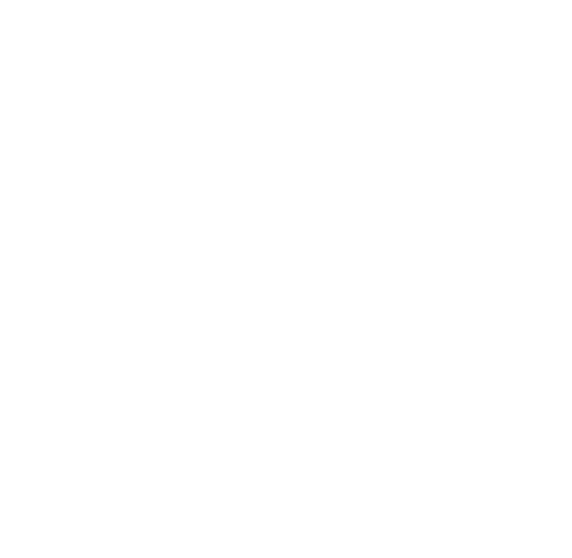

In [64]:
#report eq flow for one example city and one randomly closed link (flex removed_link, but can't choose more than max edges)
#max_edges = len(cities_dict[city]['0']['network'].graph.edges)
#print('max_edges:', max_edges)
removed_link = 23
print('Equilibrium flow for removed link number',removed_link, 'in', city)
print('Results for:', city)
trial_run.cities_dict[city][str(removed_link)]['fw_run'].showODFlow() #equilibrium flows
trial_run.cities_dict[city][str(removed_link)]['fw_run'].showODFlowMap() #flow map

# Save file

In [65]:
save_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/pickles/'
os.chdir(save_path)
EMA_dict = cities_dict
with open('EMA_30.pickle', 'wb') as handle:
    pickle.dump(EMA_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)